In [9]:
import os
import cv2
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [10]:
data_folder_name = "DM_dataset_hw1"

In [11]:
cwd = os.getcwd()
ws_path = os.path.abspath(os.path.join(cwd, os.pardir))
data_path = os.path.join(ws_path, data_folder_name)
categories = os.listdir(data_path)

In [12]:
images = []
labels = []

In [13]:
for category in categories:
    category_path = os.path.join(data_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        # Read image
        image = cv2.imread(image_path)
        # Resize image
        image = cv2.resize(image, (28,28) , interpolation = cv2.INTER_LINEAR)
        # Convert image to 1D array 
        image = image.flatten()
        # Normalize image array
        image = image / 255
        # Add image to data
        images.append(image)
        labels.append(category)

In [14]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size = 0.2, random_state = 42, shuffle=True)

# Train KNN

---					---
For metric:  minkowski and k:  3
Train time:  0.014856815338134766
Test time:  0.06772685050964355
              precision    recall  f1-score   support

     battery       0.76      0.39      0.51        72
 dc_volt_src       0.84      0.40      0.54        90
       diode       0.43      0.31      0.36        52
         gnd       0.50      0.83      0.62        18
    inductor       0.23      0.62      0.34        16
    resistor       0.17      1.00      0.30         7
   voltmeter       0.42      1.00      0.59        18

    accuracy                           0.48       273
   macro avg       0.48      0.65      0.47       273
weighted avg       0.64      0.48      0.49       273



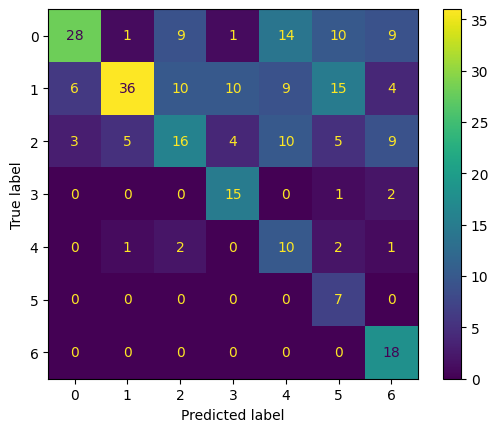

---					---

---					---
For metric:  minkowski and k:  5
Train time:  0.012042999267578125
Test time:  0.07084321975708008
              precision    recall  f1-score   support

     battery       0.73      0.53      0.61        51
 dc_volt_src       0.79      0.48      0.60        71
       diode       0.62      0.34      0.44        67
         gnd       0.57      0.85      0.68        20
    inductor       0.40      0.57      0.47        30
    resistor       0.25      0.83      0.38        12
   voltmeter       0.47      0.91      0.62        22

    accuracy                           0.54       273
   macro avg       0.55      0.64      0.54       273
weighted avg       0.63      0.54      0.55       273



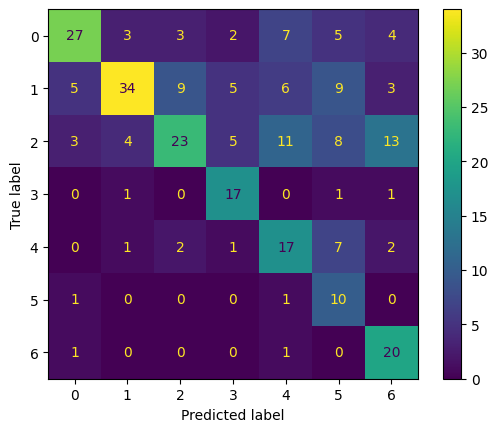

---					---

---					---
For metric:  minkowski and k:  7
Train time:  0.00969696044921875
Test time:  0.10057592391967773
              precision    recall  f1-score   support

     battery       0.51      0.53      0.52        36
 dc_volt_src       0.74      0.38      0.50        85
       diode       0.65      0.33      0.44        73
         gnd       0.57      1.00      0.72        17
    inductor       0.35      0.47      0.40        32
    resistor       0.20      0.62      0.30        13
   voltmeter       0.37      0.94      0.53        17

    accuracy                           0.48       273
   macro avg       0.48      0.61      0.49       273
weighted avg       0.58      0.48      0.48       273



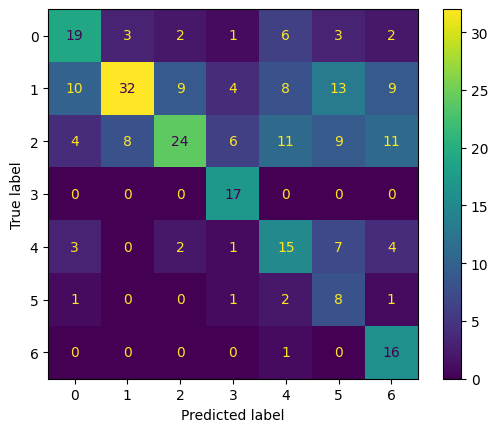

---					---

---					---
For metric:  manhattan and k:  3
Train time:  0.00945901870727539
Test time:  0.9370219707489014
              precision    recall  f1-score   support

     battery       0.76      0.47      0.58        59
 dc_volt_src       0.91      0.34      0.49       115
       diode       0.49      0.38      0.43        47
         gnd       0.40      0.86      0.55        14
    inductor       0.23      0.77      0.36        13
    resistor       0.20      1.00      0.33         8
   voltmeter       0.40      1.00      0.57        17

    accuracy                           0.48       273
   macro avg       0.48      0.69      0.47       273
weighted avg       0.69      0.48      0.50       273



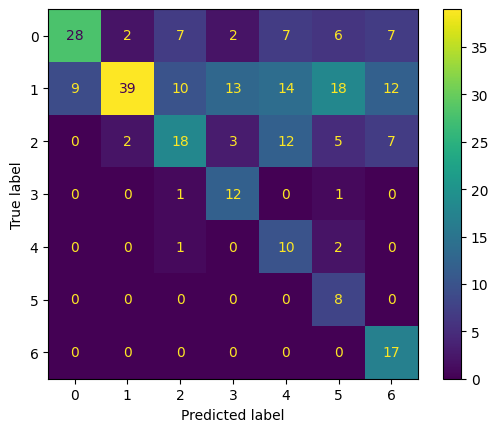

---					---

---					---
For metric:  manhattan and k:  5
Train time:  0.009412050247192383
Test time:  0.9695310592651367
              precision    recall  f1-score   support

     battery       0.70      0.49      0.58        53
 dc_volt_src       0.81      0.32      0.46       109
       diode       0.51      0.40      0.45        48
         gnd       0.40      1.00      0.57        12
    inductor       0.33      0.61      0.42        23
    resistor       0.23      0.69      0.34        13
   voltmeter       0.35      1.00      0.52        15

    accuracy                           0.48       273
   macro avg       0.48      0.64      0.48       273
weighted avg       0.63      0.48      0.48       273



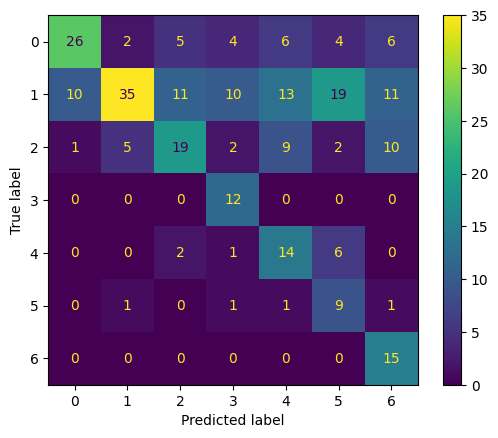

---					---

---					---
For metric:  manhattan and k:  7
Train time:  0.01115107536315918
Test time:  0.928480863571167
              precision    recall  f1-score   support

     battery       0.46      0.49      0.47        35
 dc_volt_src       0.86      0.26      0.40       144
       diode       0.51      0.44      0.48        43
         gnd       0.43      1.00      0.60        13
    inductor       0.26      0.79      0.39        14
    resistor       0.20      0.67      0.31        12
   voltmeter       0.28      1.00      0.44        12

    accuracy                           0.43       273
   macro avg       0.43      0.66      0.44       273
weighted avg       0.65      0.43      0.43       273



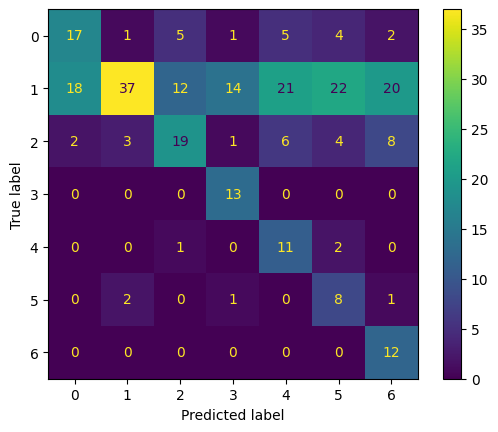

---					---



In [15]:
from sklearn.neighbors import KNeighborsClassifier

metrics = ["minkowski", "manhattan"]
k_values = [3, 5 ,7]
for c_metric in metrics:
    for c_k in k_values:
        print("---\t\t\t\t\t---")
        print("For metric: ", c_metric, "and k: ", c_k)
        knn = KNeighborsClassifier(n_neighbors = c_k, metric = c_metric)
        train_start = time()
        knn.fit(X_train, y_train)
        print("Train time: ", time() - train_start)
        test_start = time()
        prediction = knn.predict(X_test)
        print("Test time: ", time() - test_start)
        print(classification_report(prediction, y_test))
        cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(prediction, y_test))
        cm_display.plot()
        plt.show()
        print("---\t\t\t\t\t---\n")

# Train Decision Tree

---					---
For criterion:  entropy
Train time:  0.4898068904876709
Test time:  0.0033860206604003906
              precision    recall  f1-score   support

     battery       0.27      0.29      0.28        35
 dc_volt_src       0.58      0.45      0.51        56
       diode       0.49      0.51      0.50        35
         gnd       0.53      0.41      0.46        39
    inductor       0.35      0.43      0.38        35
    resistor       0.12      0.17      0.14        30
   voltmeter       0.53      0.53      0.53        43

    accuracy                           0.41       273
   macro avg       0.41      0.40      0.40       273
weighted avg       0.44      0.41      0.42       273



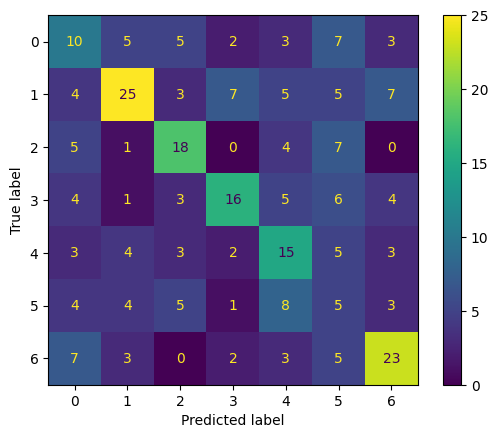

---					---

---					---
For criterion:  gini
Train time:  0.46691203117370605
Test time:  0.0046291351318359375
              precision    recall  f1-score   support

     battery       0.49      0.40      0.44        45
 dc_volt_src       0.53      0.49      0.51        47
       diode       0.51      0.49      0.50        39
         gnd       0.50      0.47      0.48        32
    inductor       0.49      0.53      0.51        40
    resistor       0.25      0.33      0.29        30
   voltmeter       0.60      0.65      0.63        40

    accuracy                           0.48       273
   macro avg       0.48      0.48      0.48       273
weighted avg       0.49      0.48      0.49       273



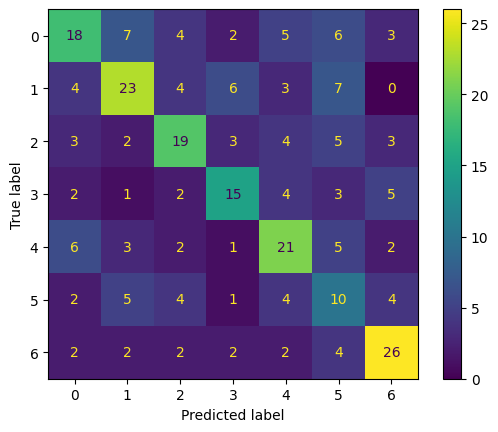

---					---



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
criterions = ["entropy", "gini"]
for c_criterion in criterions:
    print("---\t\t\t\t\t---")
    print("For criterion: ", c_criterion)
    dt = DecisionTreeClassifier(criterion = c_criterion)
    train_start = time()
    dt.fit(X_train, y_train)
    print("Train time: ", time() - train_start)
    test_start = time()
    prediction = dt.predict(X_test)
    print("Test time: ", time() - test_start)
    print(classification_report(prediction, y_test))
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(prediction, y_test))
    cm_display.plot()
    plt.show()
    print("---\t\t\t\t\t---\n")

<Figure size 640x480 with 0 Axes>

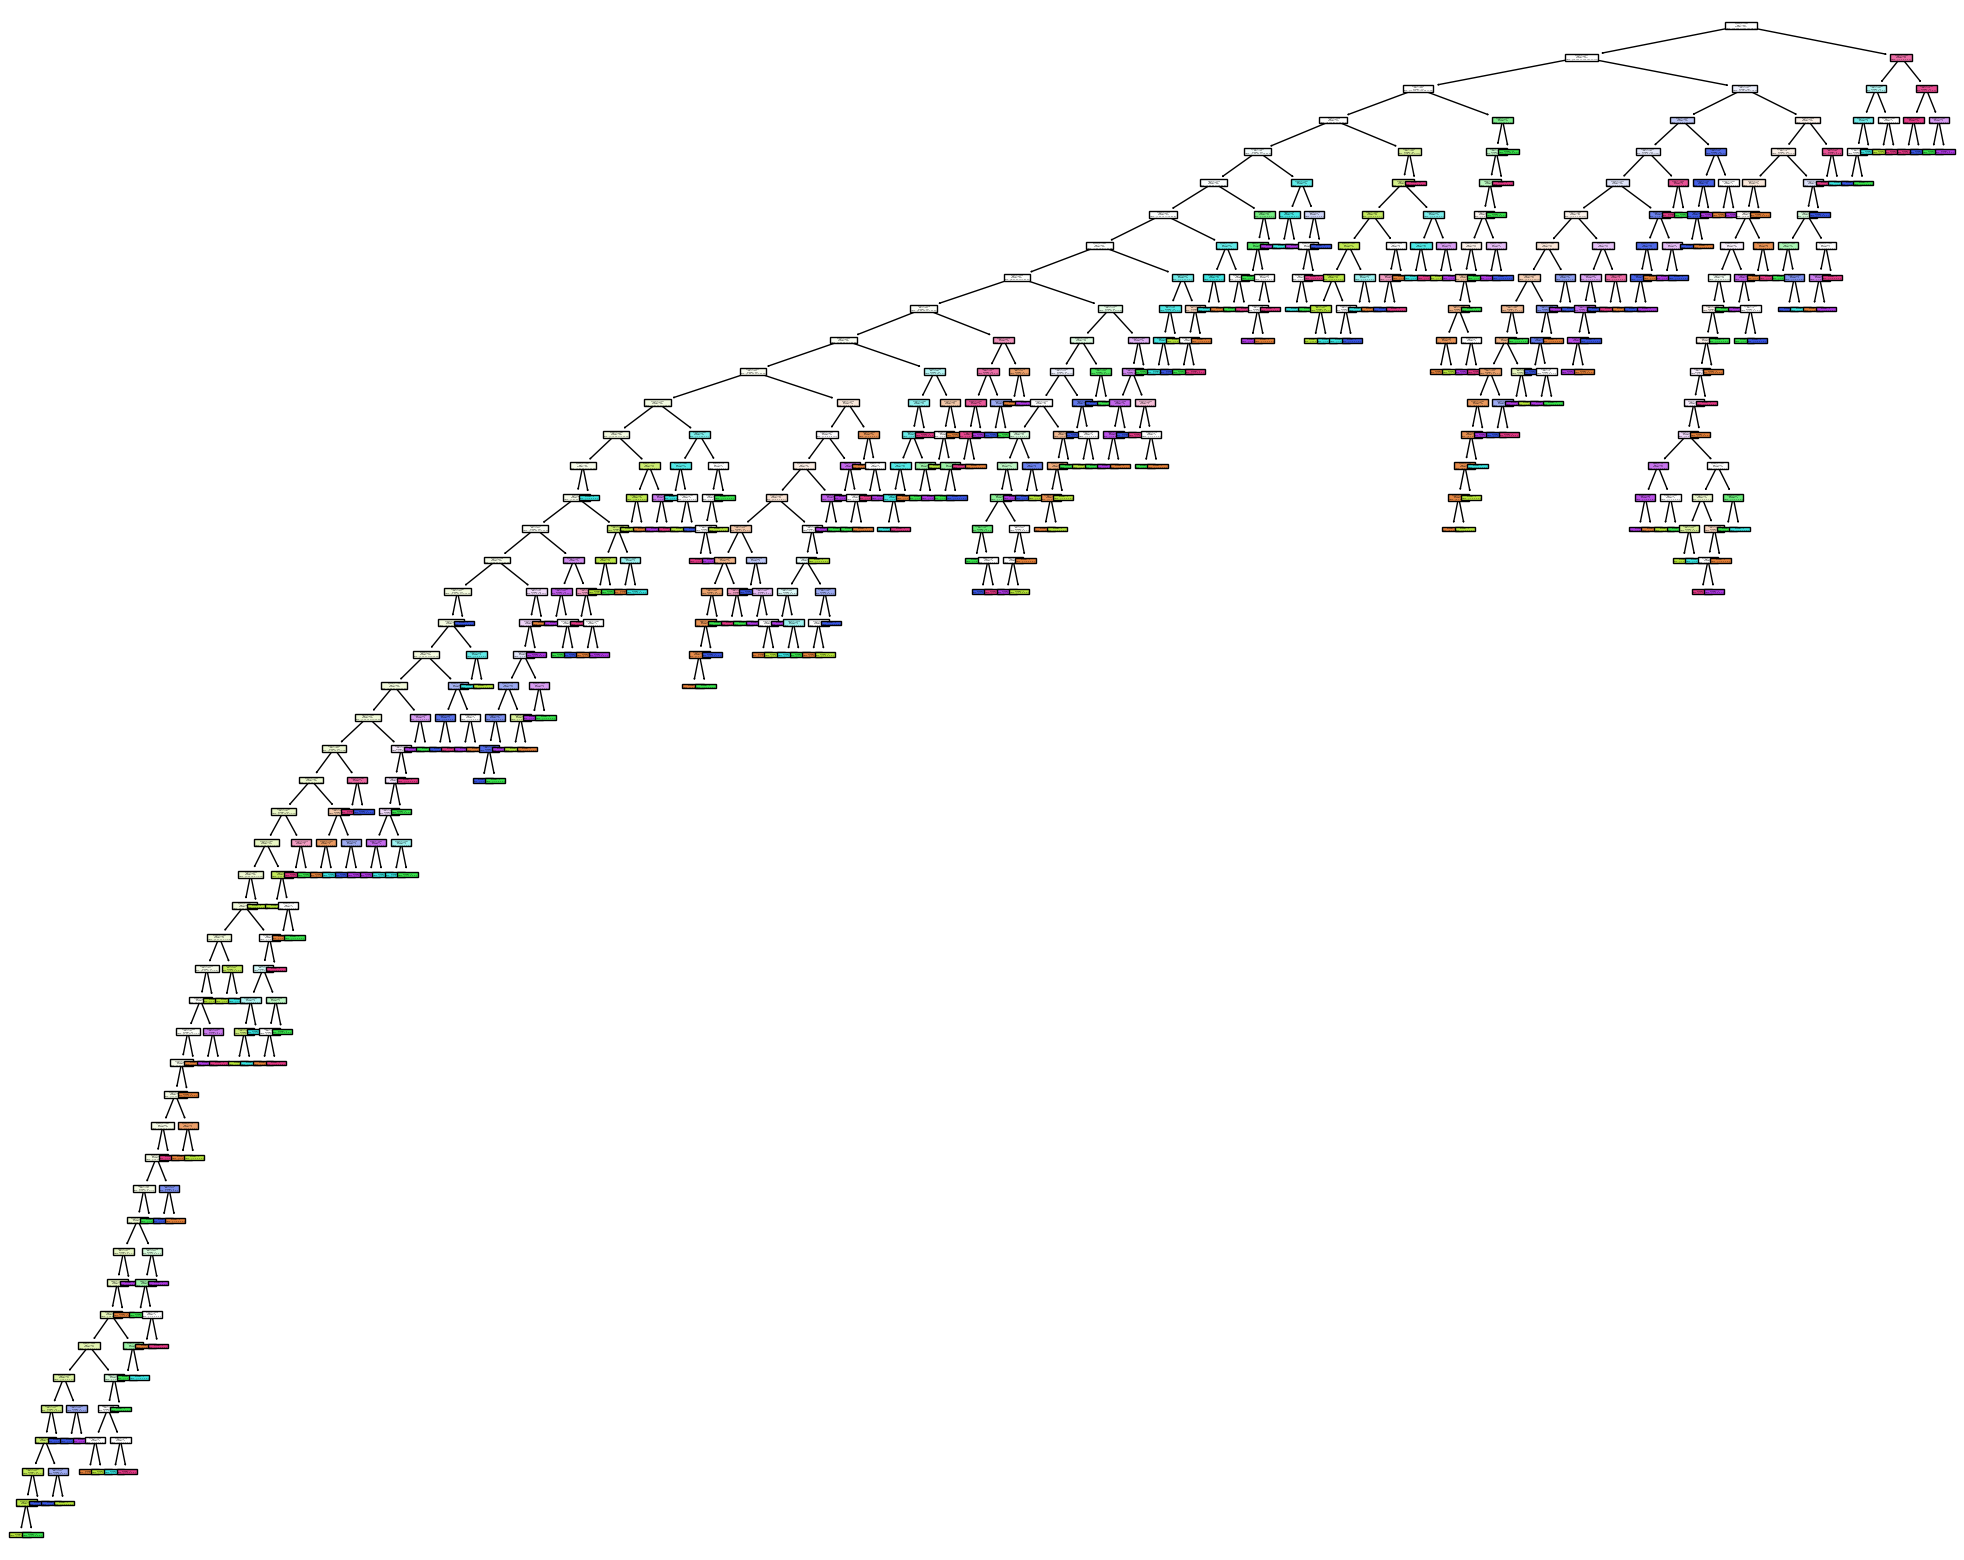

In [17]:
# Visualize Decision Tree
dt = DecisionTreeClassifier(criterion = "gini")
dt.fit(X_train, y_train)
plt.clf()
fig = plt.figure(figsize=(25,20))
plot_tree(dt, filled=True)#feature_names=iris.feature_names,  class_names=iris.target_names,filled=True)
plt.show()

# Train Naive Bayes

---					---
For Naive Bayes: 
Train time:  0.08676409721374512
Test time:  0.04144692420959473
              precision    recall  f1-score   support

     battery       0.35      0.81      0.49        16
 dc_volt_src       0.47      0.71      0.56        28
       diode       0.57      0.64      0.60        33
         gnd       0.83      0.48      0.61        52
    inductor       0.81      0.44      0.57        80
    resistor       0.20      0.36      0.26        22
   voltmeter       0.72      0.74      0.73        42

    accuracy                           0.56       273
   macro avg       0.56      0.60      0.55       273
weighted avg       0.66      0.56      0.57       273



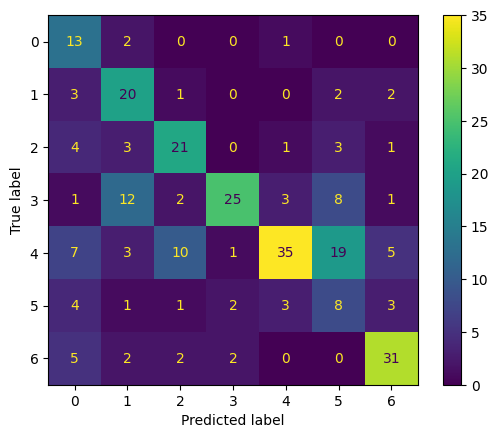

---					---



In [18]:
from sklearn.naive_bayes import GaussianNB
print("---\t\t\t\t\t---")
print("For Naive Bayes: ")
nb = GaussianNB()
train_start = time()
nb.fit(X_train, y_train)
print("Train time: ", time() - train_start)
test_start = time()
prediction = nb.predict(X_test)
print("Test time: ", time() - test_start)
print(classification_report(prediction, y_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(prediction, y_test))
cm_display.plot()
plt.show()
print("---\t\t\t\t\t---\n")

# Train SVM

---					---
For Naive Bayes: 
Train time:  1.4020638465881348
Test time:  0.3224060535430908
              precision    recall  f1-score   support

     battery       0.54      0.41      0.47        49
 dc_volt_src       0.77      0.57      0.65        58
       diode       0.49      0.49      0.49        37
         gnd       0.83      0.71      0.77        35
    inductor       0.60      0.68      0.64        38
    resistor       0.17      0.44      0.25        16
   voltmeter       0.74      0.80      0.77        40

    accuracy                           0.59       273
   macro avg       0.59      0.59      0.58       273
weighted avg       0.64      0.59      0.60       273



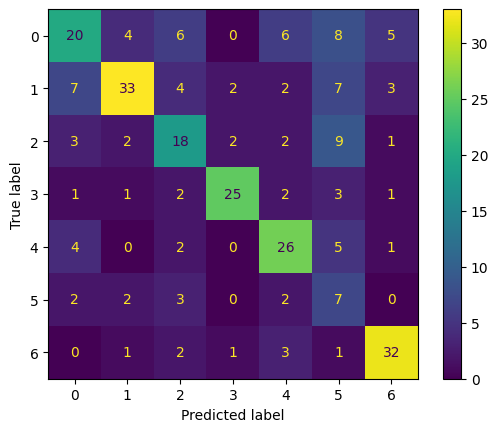

---					---



In [19]:
from sklearn.svm import SVC

print("---\t\t\t\t\t---")
print("For Naive Bayes: ")
m_svm = SVC(kernel="linear") 
train_start = time()
m_svm.fit(X_train, y_train)
print("Train time: ", time() - train_start)
test_start = time()
prediction = m_svm.predict(X_test)
print("Test time: ", time() - test_start)
print(classification_report(prediction, y_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(prediction, y_test))
cm_display.plot()
plt.show()
print("---\t\t\t\t\t---\n")